<a href="https://colab.research.google.com/github/mhmd2015/ImageProcessing1UIC/blob/main/DIP_UIC_JPEG_DCT_Demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JPEG DCT Demo**
This is a great demo of the Discrete Cosine Transform (DCT) and is the essence of JPEG encoding.

In [12]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
#from scipy import misc # pip install Pillow
#import scipy.misc
import cv2
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

Show original

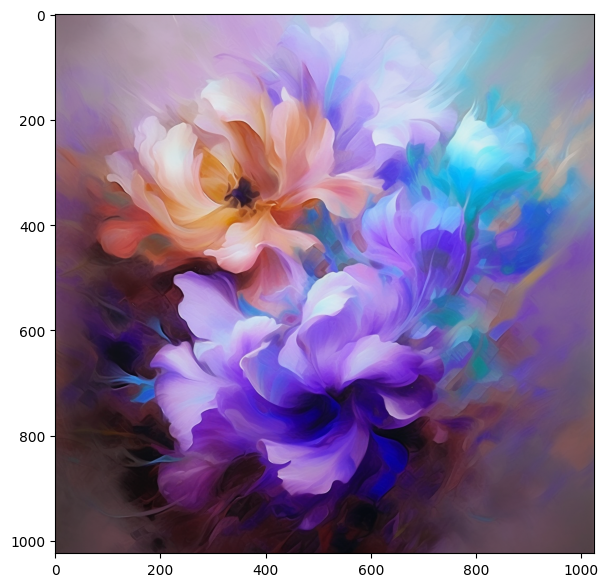

In [25]:
im = cv2.imread('flowers1.tif')
f = plt.figure()
plt.imshow(im)

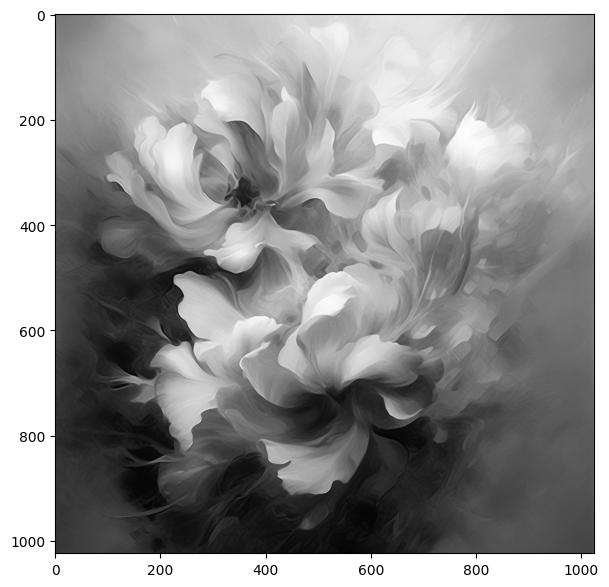

In [16]:
# im = misc.imread("einstein.tif").astype(float)
# im = misc.imread("house.tif").astype(float)
#im = misc.imread("flowers1.tif").astype(float)
#im = scipy.misc.imread("flowers1.tif").astype(float)
#im = cv2.imread('flowers1.tif')
im = cv2.imread('flowers1.tif', cv2.IMREAD_GRAYSCALE).astype(float)

# im = misc.imread("barbara.png").astype(float)

f = plt.figure()
plt.imshow(im,cmap='gray')

# Define 2D DCT and IDCT

In [18]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

# Perform a blockwise DCT

In [19]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Extract 8x8 block and look at its DCT coefficients

Text(0.5, 1.0, 'An 8x8 DCT block')

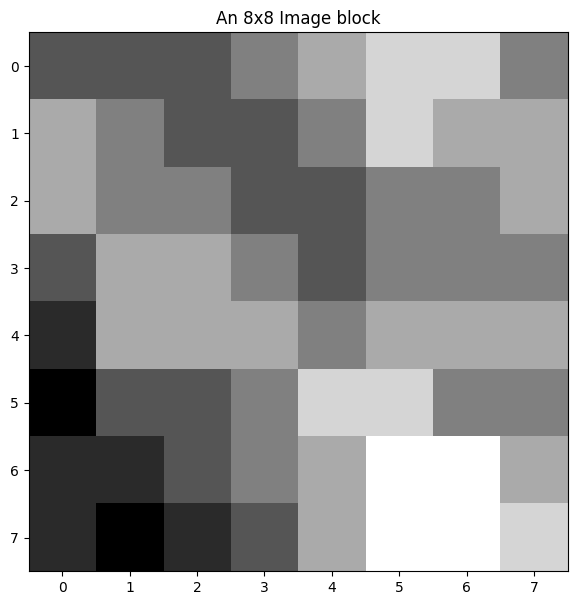

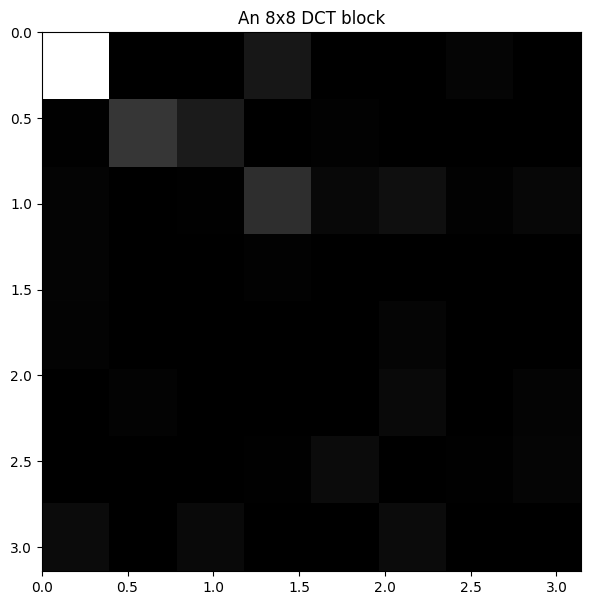

In [20]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")


# Display all DCT blocks

Text(0.5, 1.0, '8x8 DCTs of the image')

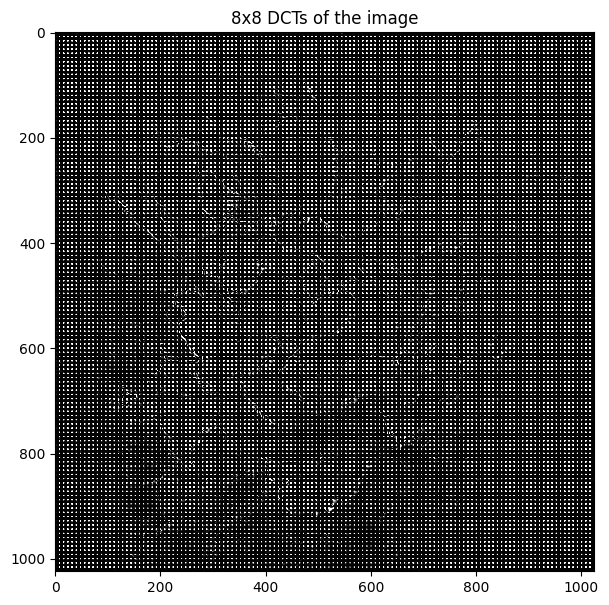

In [21]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

# Threshold DCT coefficients

Keeping only 2.771854% of the DCT coefficients


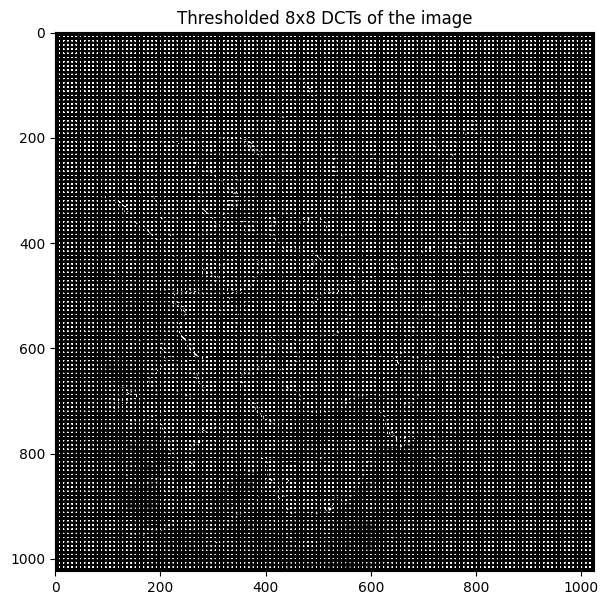

In [22]:

# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

# Compare DCT compressed image with original

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

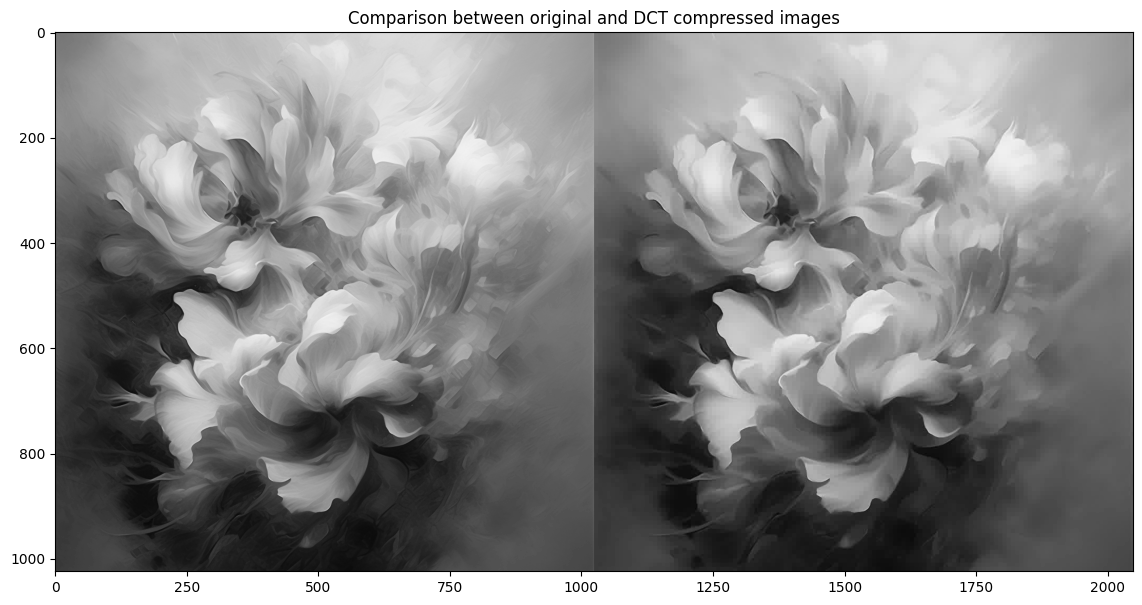

In [23]:

im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )


plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

# Compare with DFT compressed image

Keeping only 2.771854% of the DCT coefficients
Keeping only 2.844715% of the DFT coefficients


Text(0.5, 1.0, 'Comparison between original, DCT compressed and DFT compressed images')

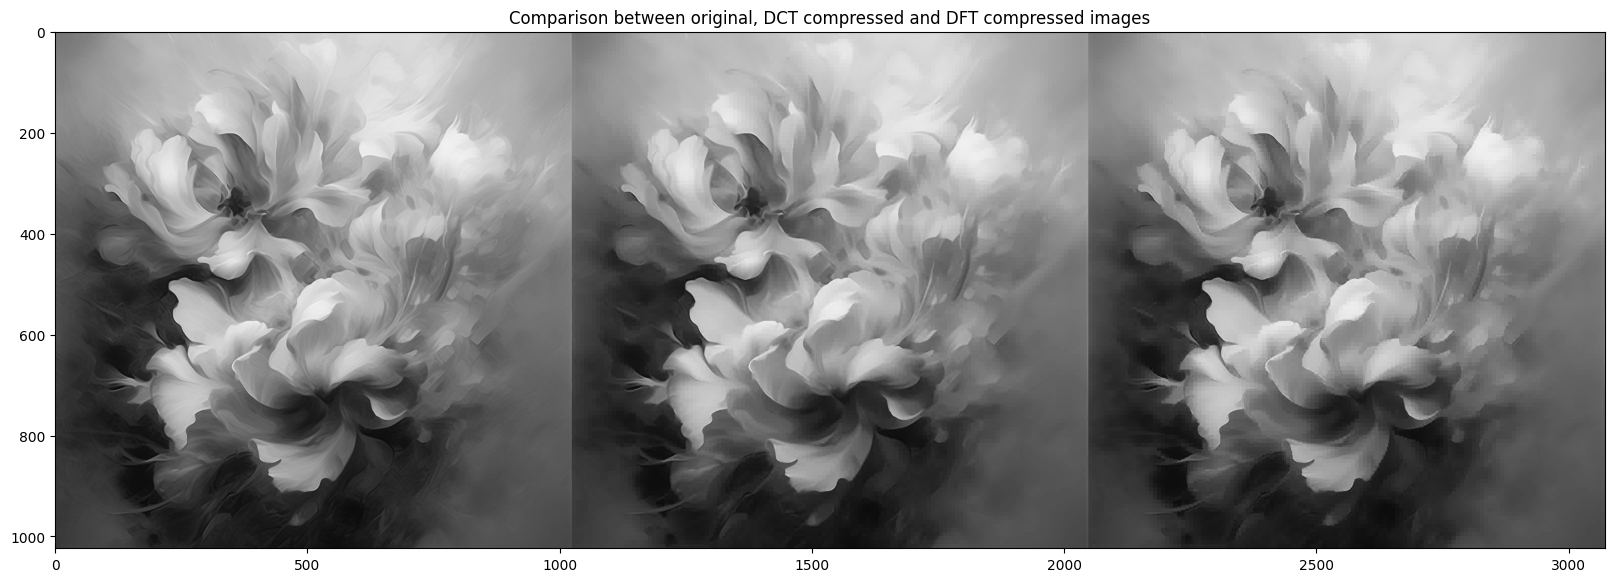

In [24]:
dft = zeros(imsize,dtype='complex');
im_dft = zeros(imsize,dtype='complex');

# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

# Thresh
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))
print ("Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )


plt.figure()
plt.imshow( np.hstack( (im, im_dct, abs(im_dft)) ) ,cmap='gray')
plt.title("Comparison between original, DCT compressed and DFT compressed images" )